![UPS](ups.png)
&nbsp;

**Nombre:** Jonathan Atancuri

**Asignatura:** Simulacion

# Prueba de Simulacion

#### Enunciado:

*	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
    * Se tiene los datos del ecuador 
    (https://github.com/andrab/ecuacovid/tree/master/datos_crudos). En base a    ello obtener los siguientes modelos:
        *	Generar graficas para entender y procesar los datos:
            *	Generar graficas y reportes del total de personas  vacunadas.
            *	Generar grafico de pie por fabricante de la vacuna.
            *	Generar histogramas de vacunas por mes de llega y fabricante.
    *	Generar un reporte parametrizado que pueda ingresar los datos de las fechas inicio y fin para obtener la información de las graficas vistas en el primer punto.
    *	Generar un modelo matemático de predicción para regresión lineal, exponencial, polinómico y logarítmico, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas.
    *	Desarrollar y generar un proceso de comparación con al menos cuatro países (2. Latinoamérica, 1. E.E.U.U./Canada,  1. Europa).
    *	Generar las graficas de regresión y comparar.
    *	Identificar cual es la fecha tentativa en la que todos los Ecuatorianos podrán ser vacunados con las dos dosis.
*	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
    *	Generar un cuaderno de Python para el desarrollo y parametrización de graficas, reportes, regresiones.
    *	Obtener los siguientes análisis:
        *	Cual tiene una mejor predicción.
        *	Ventajas y desventajas de los modelos.
    *	Opinión
    *	Conclusiones
    *	Recomendaciones.
*	Fechas de Presentación: 09/05/2021 – 23:55 Subir al Avac en formato PDF y al Git los cuadernos de Python.

* Puntos Adicionales:
    *	Generar una correlación del plan de vacunas con las vacunas realizadas actuales



##### Referencias:

* [1]: https://www.salud.gob.ec/plan-nacional-de-vacunacion-ecuador-2021-llega-segundo-lote-de-vacunas-pfizer-por-16-380-dosis/
* [2]: https://www.edicionmedica.ec/secciones/salud-publica/-cuantas-personas-ya-se-han-vacunado-contra-la-covid-19-en-el-ecuador--97224




In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from time import time
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import pygame
from matplotlib.dates import DateFormatter, WeekdayLocator



pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
plotlin = plt
plotlog = plt
plotexp = plt
plotpol = plt
plotsir = plt
start_date = "21/01/2021"
url = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv'
df = pd.read_csv(url)
df.head(10)

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962
5,24/02/2021,24492,20784,3708
6,01/03/2021,42114,35886,6228
7,04/03/2021,59316,53088,6228
8,05/03/2021,71148,64920,6228
9,08/03/2021,74472,68244,6228


Total de Vacunados
1289962.0


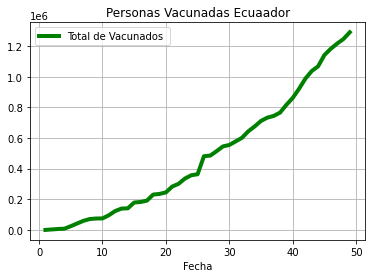

In [3]:

clasificador = df[df['dosis_total'] != 0]
#print(clasificador)
ndf1=clasificador[['fecha','dosis_total']]
#print(ndf1)
x=np.arange(1,len(ndf1)+1,1) # arreglo primer dia 
y=np.array(ndf1.values[:,1], dtype='float')

print("Total de Vacunados")
print(y[len(y)-1])
plt.plot(x,y,label='Total de Vacunados ', linewidth=4.0 ,color='green') 
plt.xlabel("Fecha")
plt.grid(True)
plt.legend()
plt.title('Personas Vacunadas Ecuaador');

### Regresion Lineal

In [4]:

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 


# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 27041.89295918367, b = -195179.89540816325
y = 27041.89295918367x -195179.89540816325


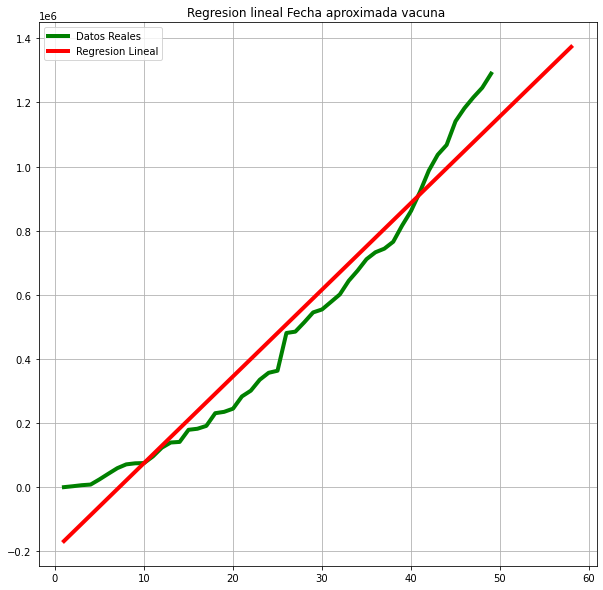

In [5]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(10, 10))
plt.plot(x,y,label='Datos Reales',linewidth=4.0 ,color='green')
plt.grid(True)
plt.title('Regresion lineal Fecha aproximada vacuna ');
x1=np.arange(1,len(ndf1)+10,1)
y1=fun(x1)


plt.plot(x1,y1,color='red',linewidth=4.0,label='Regresion Lineal')
plt.legend()
plt.show()

### Regresion Exponencial

[0.10658319 9.69124219]


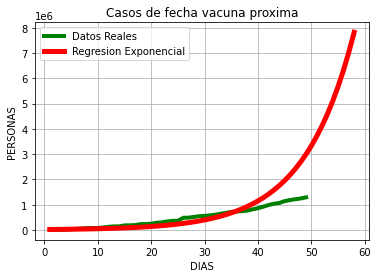

In [6]:
xexp=x
yexp=y
ndf1exp=ndf1

curve_fit=np.polyfit(xexp,np.log(yexp),1)
print(curve_fit)
pred_xe=np.array(list(range(min(xexp),max(xexp)+10)))


yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_xe)
plt.title('Casos de fecha vacuna proxima')
plt.plot(xexp,yexp,"green",linewidth=4.0,label='Datos Reales')
plt.plot(pred_xe,yx,color='red',linewidth=5.0, label="Regresion Exponencial")
plt.xlabel('DIAS')
plt.ylabel('PERSONAS')
plt.legend()
plt.grid(True)

### Regresion Polinomica

           6          5         4         3        2
-0.001779 x + 0.2736 x - 15.91 x + 433.3 x - 5097 x + 3.388e+04 x - 4.855e+04


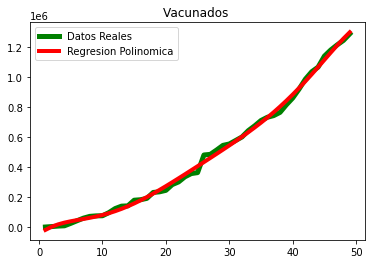

In [7]:
xpol=x
ypol=y
polndf1=ndf1
#Vacunados
fun1 = np.poly1d(np.polyfit(xpol, ypol, 6))
print(fun1)
y_pred=fun1(xpol)
plt.title('Vacunados ')
plt.plot(xpol, ypol, "green",linewidth=5.0 ,label='Datos Reales' )
plt.plot(xpol, y_pred, c='r',linewidth=4.0 ,label='Regresion Polinomica')
plt.legend()
plt.show()

### Regresion Logaritmica

In [8]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression

xlog=x
ylog=y
ndf1log=ndf1

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,xlog,ylog) #Extraemos los valores de los paramatros

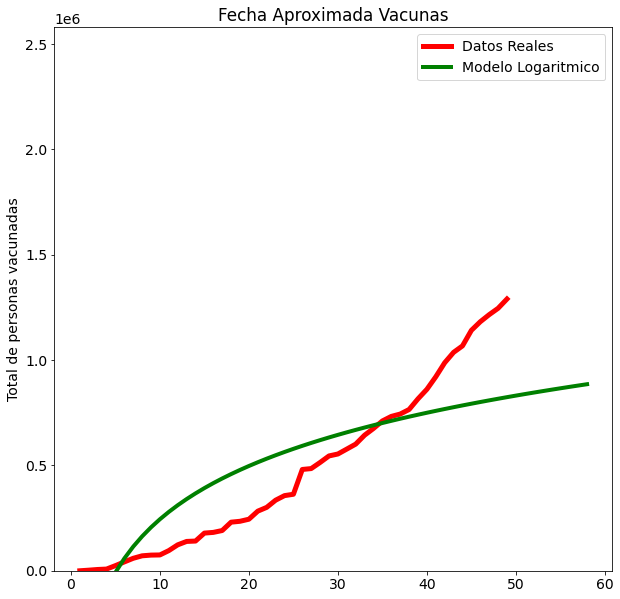

In [9]:
pred_x = list(range(min(xlog),max(xlog)+10)) # Predecir 10 dias mas
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
# Real data
plt.plot(xlog,ylog,label="Datos Reales",linewidth=5.0 ,color="red")
# Predicted exponential curve
pred_y=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.title('Fecha Aproximada Vacunas')
plt.plot(pred_x, pred_y, "green" ,linewidth=4.0 ,label="Modelo Logaritmico" )
plt.legend()
plt.ylabel("Total de personas vacunadas")
plt.ylim(0,max(y)*2) # Definir los limites de Y
plt.show()

### Grafica de Vacunas por mes de Llegada y el Fabricante

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv')
df

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021
5,Pfizer/BioNTech,73710,10/03/2021
6,Oxford/AstraZeneca,84000,17/03/2021
7,Pfizer/BioNTech,62010,17/03/2021
8,Pfizer/BioNTech,65520,24/03/2021
9,Pfizer/BioNTech,66690,31/03/2021


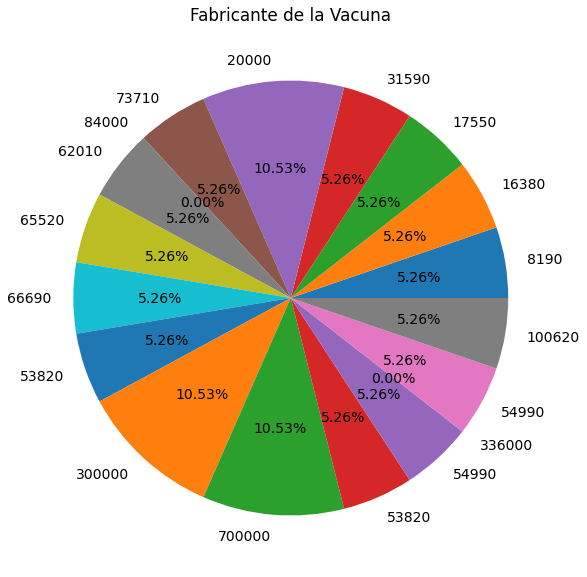

In [12]:
from sklearn import preprocessing

number = preprocessing.LabelEncoder()
df['vaccine'] = number.fit_transform(df['vaccine'])
df=df.fillna(-999) # fill holes with default value
Fabricantes = df["vaccine"]
Total = df["total"]
x=[]
y=[]
x=list(Fabricantes)
y=list(Total)
plt.pie(x,labels=y,autopct='%.2f%%')
plt.title("Fabricante de la Vacuna");

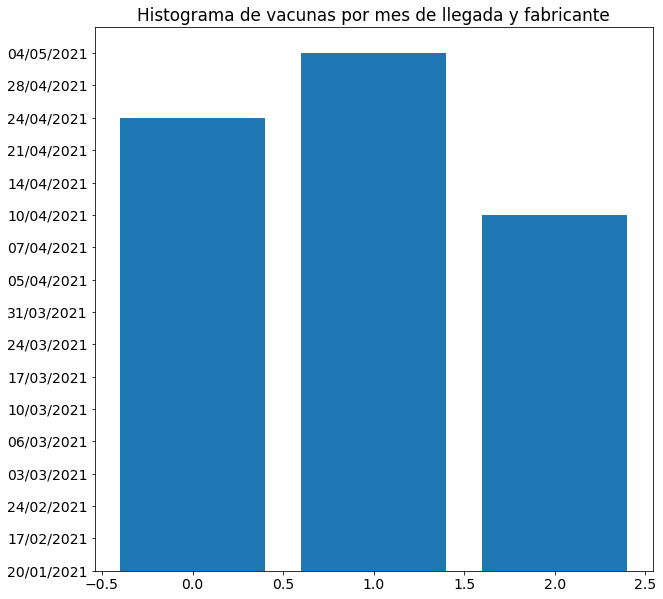

In [13]:
Fabricantes = df["vaccine"]
Fecha = df["arrived_at"]
x=[]
y=[]
x=list(Fabricantes)
y=list(Fecha)
plt.bar(x,y)
plt.title("Histograma de vacunas por mes de llegada y fabricante");

In [14]:
#plt.figure(figsize=(9,6))

#plt.hist(df[df['vaccine']== 'Pfizer/BioNTech'].arrived_at.tail(3))
#plt.hist(df[df['vaccine']== 'Sinovac'].arrived_at.tail(2))
#plt.hist(df[df['vaccine']== 'Oxford/AstraZeneca'].arrived_at.tail(1))

#plt.xlabel("Fabricantes")
#plt.ylabel("Fecha")
#plt.title("Histograma de vacunas por mes de llega y fabricante");
#plt.show()

### Comparacion con otros paises

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df=pd.read_csv(r"https://raw.githubusercontent.com/Navneetsingh011/Analysis-Of-Covid-Pandemic-Vaccination-Country-Wise./main/covidanalysis.csv")
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


### Dejamos solo las columnas que son importantes

In [17]:
df.drop(columns = 'iso_code', inplace = True)
df.drop(columns = 'daily_vaccinations_raw', inplace = True)
df.drop(columns = 'source_website', inplace = True)
df.drop(columns = 'total_vaccinations_per_hundred', inplace = True)
df.drop(columns = 'people_vaccinated_per_hundred', inplace = True)
df.drop(columns = 'people_fully_vaccinated_per_hundred', inplace = True)
df.drop(columns = 'daily_vaccinations_per_million', inplace = True)

In [18]:
df.isnull().sum()

country                       0
date                          0
total_vaccinations         5331
people_vaccinated          5995
people_fully_vaccinated    7966
daily_vaccinations          235
vaccines                      0
source_name                   0
dtype: int64

### Llenado de valores de NAN con la media (valores promedio o los valores más comunes en la columna del conjunto de datos)

In [19]:
df['total_vaccinations'].fillna(df['total_vaccinations'].mean(),inplace= True)
df['people_fully_vaccinated'].fillna(df['people_fully_vaccinated'].mean(),inplace= True)
df['daily_vaccinations'].fillna(df['daily_vaccinations'].mean(),inplace= True)
df['people_vaccinated'].fillna(df['people_vaccinated'].mean(),inplace= True)

In [20]:
df.isnull().sum()

country                    0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
daily_vaccinations         0
vaccines                   0
source_name                0
dtype: int64

### Cambiar el tipo de datos de la hora desde el objeto hasta la fecha y hora

In [21]:
df.date
df['date']=pd.to_datetime(df.date)

In [22]:
df.date

0       2021-02-22
1       2021-02-23
2       2021-02-24
3       2021-02-25
4       2021-02-26
           ...    
13122   2021-04-17
13123   2021-04-18
13124   2021-04-19
13125   2021-04-20
13126   2021-04-21
Name: date, Length: 13127, dtype: datetime64[ns]

In [23]:
#Changing date format.
df['date'] = pd.to_datetime(df['date'],format='%y-%m-%d').dt.date

complete_medication=df.groupby('country')['daily_vaccinations'].cumsum()
#cumsum() function is used when we want to compute the cumulative sum force by increasing addition

### Se crea una nueva columna sobre la base del país y las vacunas diarias

In [24]:
complete_medication

0         73498.595641
1         74865.595641
2         76232.595641
3         77599.595641
4         78966.595641
             ...      
13122    342048.595641
13123    355041.595641
13124    366814.595641
13125    377764.595641
13126    387888.595641
Name: daily_vaccinations, Length: 13127, dtype: float64

### Agregue una nueva columna "Complete_medication" en el conjunto de datos para obtener resultados más precisos.

In [25]:
df.insert(5,'Complete_medication',complete_medication)
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,Complete_medication,daily_vaccinations,vaccines,source_name
0,Afghanistan,2021-02-22,0.000000e+00,0.000000e+00,1.363965e+06,73498.595641,73498.595641,Oxford/AstraZeneca,Government of Afghanistan
1,Afghanistan,2021-02-23,4.264439e+06,2.872504e+06,1.363965e+06,74865.595641,1367.000000,Oxford/AstraZeneca,Government of Afghanistan
2,Afghanistan,2021-02-24,4.264439e+06,2.872504e+06,1.363965e+06,76232.595641,1367.000000,Oxford/AstraZeneca,Government of Afghanistan
3,Afghanistan,2021-02-25,4.264439e+06,2.872504e+06,1.363965e+06,77599.595641,1367.000000,Oxford/AstraZeneca,Government of Afghanistan
4,Afghanistan,2021-02-26,4.264439e+06,2.872504e+06,1.363965e+06,78966.595641,1367.000000,Oxford/AstraZeneca,Government of Afghanistan


In [26]:
print("El total de países presentes en los datos son : ",df['country'].nunique())
print("El numero total de vacunas usadas en una empresa particular es",df['vaccines'].nunique())
print("La duración de los datos es",df['date'].nunique()/30," Months")
print("El número total de dosis de vacunación administradas en todo el mundo es",
      df.daily_vaccinations.sum())

El total de países presentes en los datos son :  190
El numero total de vacunas usadas en una empresa particular es 33
La duración de los datos es 4.3  Months
El número total de dosis de vacunación administradas en todo el mundo es 964816064.9755663


### Análisis y visualización que representan hechos

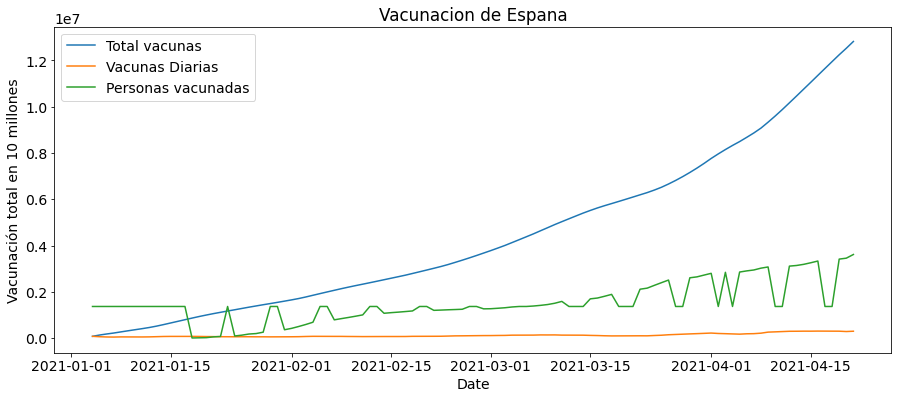

In [27]:
plt.figure(figsize=(15,6))
plt.plot(df[df['country']=='Spain'].date,df[df['country']=='Spain'].Complete_medication);
plt.plot(df[df['country']=='Spain'].date,df[df['country']=='Spain'].daily_vaccinations);
plt.plot(df[df['country']=='Spain'].date,df[df['country']=='Spain'].people_fully_vaccinated);

plt.xlabel("Date")
plt.ylabel("Vacunación total en 10 millones")

plt.title("Vacunacion de Espana");
plt.legend(['Total vacunas','Vacunas Diarias','Personas vacunadas']);

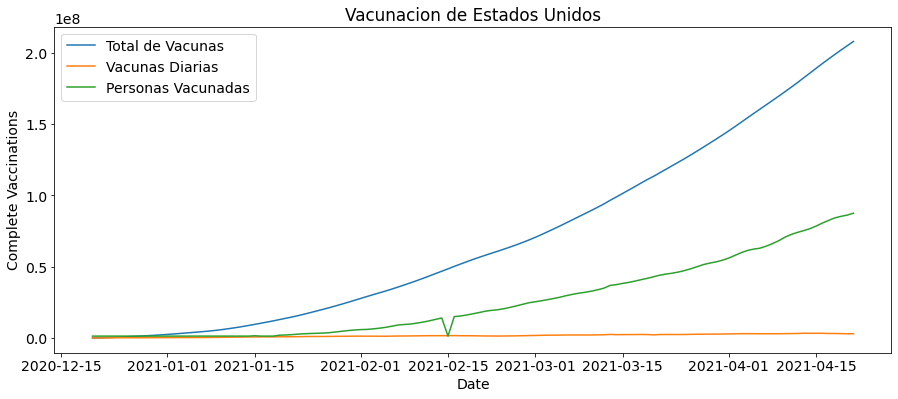

In [28]:
plt.figure(figsize=(15,6))
plt.plot(df[df['country']=='United States'].date,df[df['country']=='United States'].Complete_medication);
plt.plot(df[df['country']=='United States'].date,df[df['country']=='United States'].daily_vaccinations);
plt.plot(df[df['country']=='United States'].date,df[df['country']=='United States'].people_fully_vaccinated);

plt.xlabel("Date")
plt.ylabel("Complete Vaccinations")

plt.title("Vacunacion de Estados Unidos");
plt.legend(['Total de Vacunas','Vacunas Diarias','Personas Vacunadas']);

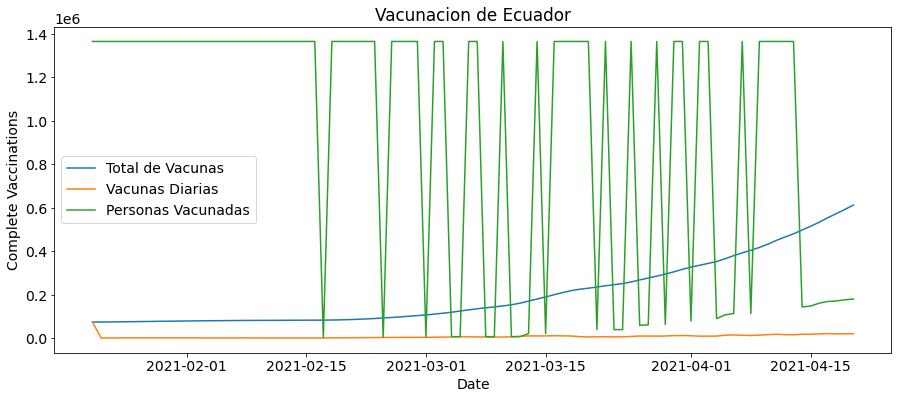

In [29]:
plt.figure(figsize=(15,6))
plt.plot(df[df['country']=='Ecuador'].date,df[df['country']=='Ecuador'].Complete_medication);
plt.plot(df[df['country']=='Ecuador'].date,df[df['country']=='Ecuador'].daily_vaccinations);
plt.plot(df[df['country']=='Ecuador'].date,df[df['country']=='Ecuador'].people_fully_vaccinated);

plt.xlabel("Date")
plt.ylabel("Complete Vaccinations")

plt.title("Vacunacion de Ecuador");
plt.legend(['Total de Vacunas','Vacunas Diarias','Personas Vacunadas']);

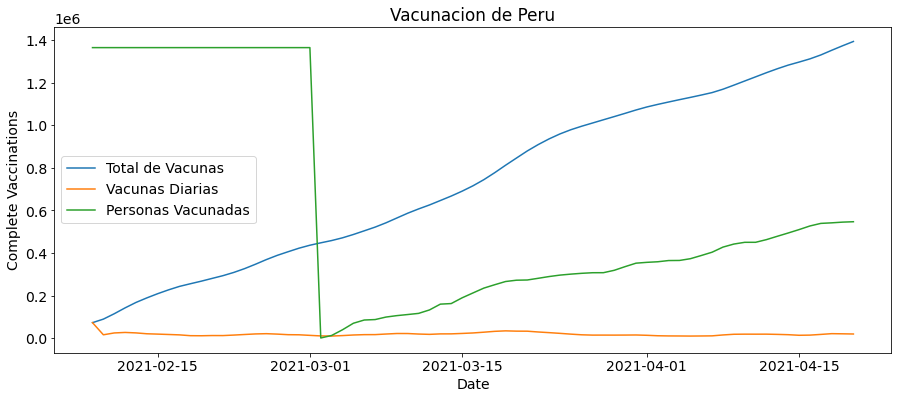

In [30]:
plt.figure(figsize=(15,6))
plt.plot(df[df['country']=='Peru'].date,df[df['country']=='Peru'].Complete_medication);
plt.plot(df[df['country']=='Peru'].date,df[df['country']=='Peru'].daily_vaccinations);
plt.plot(df[df['country']=='Peru'].date,df[df['country']=='Peru'].people_fully_vaccinated);

plt.xlabel("Date")
plt.ylabel("Complete Vaccinations")

plt.title("Vacunacion de Peru");
plt.legend(['Total de Vacunas','Vacunas Diarias','Personas Vacunadas']);

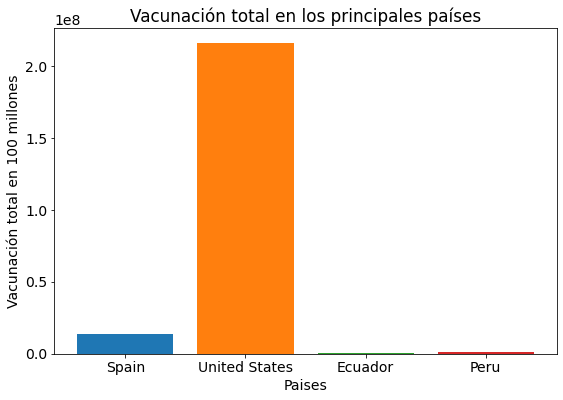

In [31]:
plt.figure(figsize=(9,6))

plt.bar(df[df['country']=='Spain'].country.tail(1),df[df['country']=='Spain'].total_vaccinations.tail(1));
plt.bar(df[df['country']=='United States'].country.tail(1),df[df['country']=='United States'].total_vaccinations.tail(1));
plt.bar(df[df['country']=='Ecuador'].country.tail(1),df[df['country']=='Ecuador'].total_vaccinations.tail(1));
plt.bar(df[df['country']=='Peru'].country.tail(1),df[df['country']=='Peru'].total_vaccinations.tail(1));

plt.title("Vacunación total en los principales países");

plt.xlabel("Paises");
plt.ylabel("Vacunación total en 100 millones");

### Comparacion de Ecuador y las otros Paises

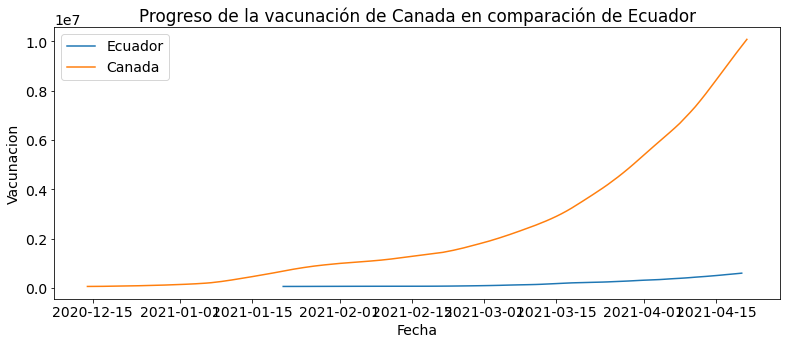

In [32]:
plt.figure(figsize=(13,5))
plt.plot(df[df['country']=='Ecuador'].date,df[df['country']=='Ecuador'].Complete_medication);
plt.plot(df[df['country']=='Canada'].date,df[df['country']=='Canada'].Complete_medication);



plt.xlabel("Fecha")
plt.ylabel("Vacunacion")

plt.title("Progreso de la vacunación de Canada en comparación de Ecuador");
plt.legend(['Ecuador','Canada']);

### Uso del Metodo Polinomial

In [ ]:
clasificador = df[df['people_vaccinated'] != 0]
#print(clasificador)
ndf1=clasificador[['country','dosis_total']]
#print(ndf1)
x=np.arange(1,len(ndf1)+1,1) # arreglo primer dia 
y=np.array(ndf1.values[:,1], dtype='float')

xpol=x
ypol=y
polndf1=ndf1
#Vacunados
fun1 = np.poly1d(np.polyfit(xpol, ypol, 6))
print(fun1)
y_pred=fun1(xpol)
plt.title('Vacunados ')
plt.plot(xpol, ypol, "green",linewidth=5.0 ,label='Datos Reales' )
plt.plot(xpol, y_pred, c='r',linewidth=4.0 ,label='Regresion Polinomica')
plt.legend()
plt.show()

### Cual tiene una mejor predicción

La Mejor Prediccion la tiene el modelo polinomial, debido a que se ajusta al comportamiento de los datos obtenidos

### Ventajas y desventajas de los modelos

* Modelo Lineal: 

    * Fácil de entender y explicar, lo que puede ser muy valioso para las decisiones de negocios. Es rápido de modelar y es particularmente útil cuando la relación a modelar no es extremadamente compleja y no tiene mucha información. Es menos propenso al sobreajuste.

    * No se puede modelar relaciones complejas. No se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro para que se ajuste a funciones no lineales. Puede sufrir con valores atípicos.
    
* Modelo Exponencial

    * Es muy usada para predecir la evolucion de un virus.
    * Se aleja de los datos conforme pasa el tiempo

* Modelo Polinomico
    * Es el que mejor se ajusta a los datos obtenidos.

    * Conforma aumenta el grado de prediccion y el numero de datos se hace mas complejo su calculo.

* Modelo Logaritmico
     * Es muy usada por su simplicidad y eficacia Es mejor cuando se usan atributos acorde a su salida
     * Imposibilidad de resolver directamente problemas no lineales. No se ajusta correctamente a los datos